In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:xlabel='charges', ylabel='Count'>

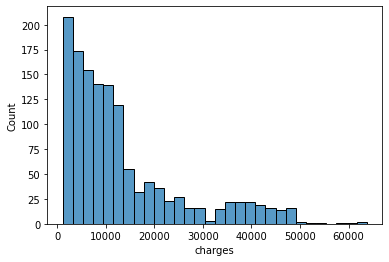

In [4]:
sns.histplot(df.charges)

<AxesSubplot:xlabel='charges', ylabel='Count'>

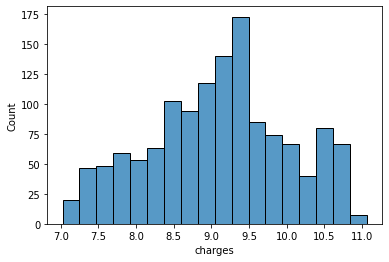

In [5]:
df.charges = np.log1p(df.charges)
sns.histplot(df.charges)

In [6]:
df.charges = np.log1p(df.charges)

In [7]:
result=[]
for value in df['smoker']:
        if value=="yes":
            result.append(1)
        else:
            result.append(0)
 
df['smoker']=result

In [8]:
df.smoker.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [9]:
res=[]
for value in df['bmi']:
        if value>30:
            res.append(1)
        else:
            res.append(0)
 
df['bmi']=res

In [10]:
df.bmi.head()

0    0
1    1
2    1
3    0
4    0
Name: bmi, dtype: int64

In [11]:
df.dtypes == object

age         False
sex          True
bmi         False
children    False
smoker      False
region       True
charges     False
dtype: bool

In [12]:
df.dtypes[df.dtypes == object]

sex       object
region    object
dtype: object

In [13]:
list(df.dtypes[df.dtypes == object].index)

['sex', 'region']

In [14]:
categorical = list(df.dtypes[df.dtypes == object].index)
numerical = list(df.dtypes[df.dtypes != object].index)

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [18]:
len(df_full_train), len(df_test)

(1070, 268)

In [19]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_val), len(df_test)

(802, 268, 268)

In [21]:
df_train

,age,sex,bmi,children,smoker,region,charges
208,63,female,1,0,0,southwest,2.355020
966,51,male,0,2,1,northwest,2.405547
278,59,male,1,2,0,southeast,2.348255
829,39,male,0,1,0,northwest,2.274090
74,44,male,0,2,0,southwest,2.297832
...,...,...,...,...,...,...,...
174,24,female,1,0,0,northwest,2.192472
136,19,male,1,0,0,southwest,2.096889
222,32,male,1,3,0,southwest,2.258303
1303,43,male,0,0,1,southwest,2.445895


In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,63,female,1,0,0,southwest,2.355020
1,51,male,0,2,1,northwest,2.405547
2,59,male,1,2,0,southeast,2.348255
3,39,male,0,1,0,northwest,2.274090
4,44,male,0,2,0,southwest,2.297832


In [24]:
y_train = df_train.charges.values
y_val = df_val.charges.values
y_test = df_test.charges.values

In [25]:
del df_train['charges']
del df_val['charges']
del df_test['charges']

In [26]:
numerical.remove('charges')

In [27]:
df_full_train[numerical].corrwith(df_full_train.charges)

age         0.542313
bmi         0.101960
children    0.139126
smoker      0.646315
dtype: float64

In [28]:
df_full_train[numerical].corrwith(np.expm1(df_full_train.charges))

age         0.523401
bmi         0.109672
children    0.126453
smoker      0.670232
dtype: float64

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
df[categorical].nunique()

sex       2
region    4
dtype: int64

In [31]:
df_train[['sex','region']].iloc[:8].to_dict()

{'sex': {0: 'female',
  1: 'male',
  2: 'male',
  3: 'male',
  4: 'male',
  5: 'female',
  6: 'female',
  7: 'male'},
 'region': {0: 'southwest',
  1: 'northwest',
  2: 'southeast',
  3: 'northwest',
  4: 'southwest',
  5: 'northwest',
  6: 'northwest',
  7: 'northeast'}}

In [32]:
dicts = df_train[['sex','region']].iloc[:8].to_dict(orient='records')

In [33]:
dv = DictVectorizer()

In [34]:
dv.fit(dicts)

DictVectorizer()

In [35]:
dicts = df_train[['sex','region']].iloc[:100].to_dict(orient='records')

In [36]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [37]:
dv.get_feature_names()

['region=northeast',
 'region=northwest',
 'region=southeast',
 'region=southwest',
 'sex=female',
 'sex=male']

In [38]:
dv.transform(dicts)

array([[0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error as mse
def test(df_train, y_train, df_val, y_val):
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(df_train.to_dict(orient='records'))
    X_val = dv.transform(df_val.to_dict(orient='records'))
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(mse(y_pred, y_val, squared=False))
    print(mse(np.expm1(y_pred), np.expm1(y_val), squared=False))
    sns.histplot(np.expm1(y_pred), color='red', bins = 50, alpha=0.5)
    sns.histplot(np.expm1(y_val), color = 'blue', bins = 50, alpha = 0.5)

0.04586872123774586
0.4610830024940047


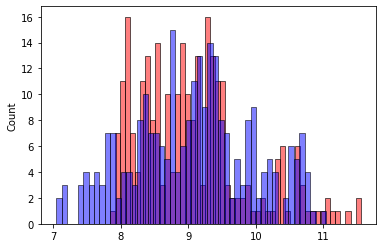

In [40]:
test(df_train[numerical+categorical],y_train,df_val[numerical+categorical],y_val)

In [41]:
for example in df['age']:
    if (0 <example <21):
        example=1
    elif (21<example<41):
        example=2
    elif (41<example<61):
        example=3
    elif (61<example<81):
        example=4
    elif (81<example<101):
        example=5
